In [44]:
from IPython.display import Image # resim import etmek için kullanırız.    Image(filename = "") ile ise resmi import ederiz.
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sbn 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
sbn.set_style("darkgrid") # tema seçimi yaptık 
df = pd.read_csv("starbucks.csv",index_col=0) # indexi düzgün başlamadığı için 0'ladık. 
df.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [7]:
df.isnull().sum() # görüldüğü üzere NaN veri yok.

item        0
calories    0
fat         0
carb        0
fiber       0
protein     0
type        0
dtype: int64

In [8]:
df.dtypes # tüm sutunların veri tünü gördük.

item         object
calories      int64
fat         float64
carb          int64
fiber         int64
protein       int64
type         object
dtype: object

In [13]:
df.describe().T # sutunların bilgilerini görebiliz.

,count,mean,std,min,25%,50%,75%,max
calories,77.0,338.831169,105.368701,80.0,300.0,350.0,420.0,500.0
fat,77.0,13.766234,7.095488,0.0,9.0,13.0,18.0,28.0
carb,77.0,44.870130,16.551634,16.0,31.0,45.0,59.0,80.0
fiber,77.0,2.220779,2.112764,0.0,0.0,2.0,4.0,7.0
protein,77.0,9.480519,8.079556,0.0,5.0,7.0,15.0,34.0


In [14]:
df.info() # DataFrame hakkında temel bilgileri görebiliriz.

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [16]:
df.item.nunique() # kaç adet unique değer var görebiliriz.

77

In [17]:
df.item.unique() # unique değerleri bir array içerisinde görürüz.

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [21]:
df.type.unique() # unique olan type verilerini görebiliriz.

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [22]:
df.groupby("type")["item"].count() # tipe göre grupla. item değerlerini al. .count() ile kaç adet görebiliriz. 

type
bakery           41
bistro box        8
hot breakfast     8
parfait           3
petite            9
salad             1
sandwich          7
Name: item, dtype: int64

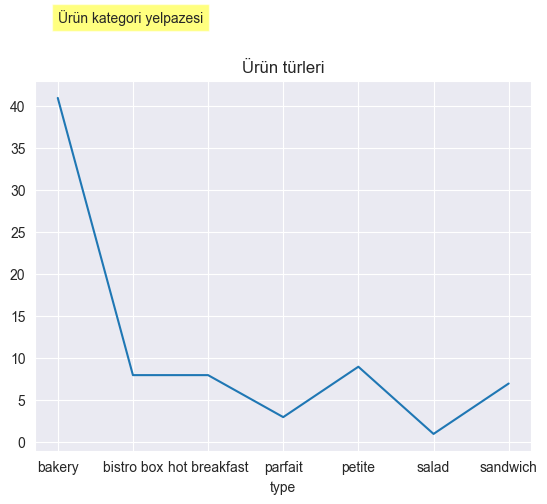

In [23]:
%matplotlib inline
df.groupby("type")["item"].count().plot()
plt.title("Ürün türleri")
plt.text(0.,50,"Ürün kategori yelpazesi",bbox = dict(facecolor = "yellow",alpha = 0.5))
plt.show()

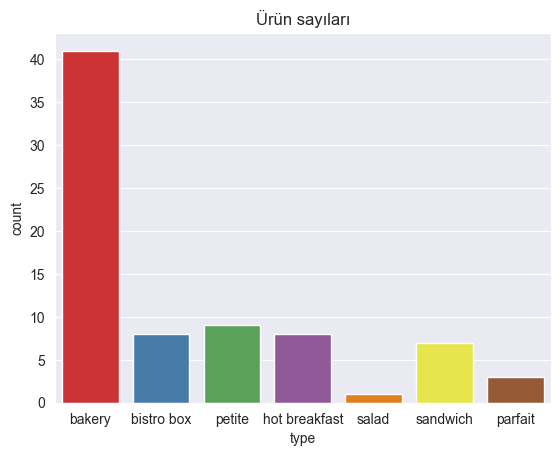

In [24]:
sbn.countplot(x = "type",data=df,palette="Set1") # x = ile biz hangi sutunun değerleri kullanılacak bunu belirledik.
plt.title("Ürün sayıları")
plt.show()

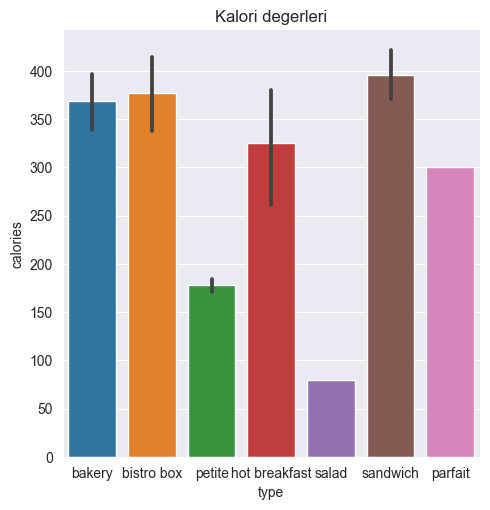

In [26]:
sbn.catplot(data=df,x = "type",y = "calories",kind = "bar")
plt.title("Kalori degerleri")
plt.show()
# siyah çizginin uzun oldukları gruplar'ın kalorisi fazladır.

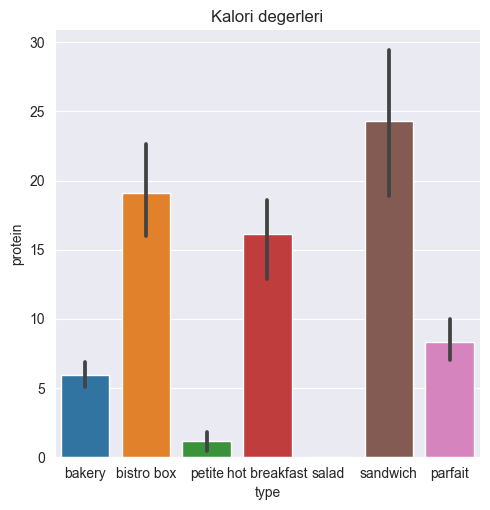

In [27]:
sbn.catplot(data=df,x = "type",y = "protein",kind = "bar")
plt.title("Kalori degerleri")
plt.show()
# siyah çizgisi uzun olanın proteini fazladır.

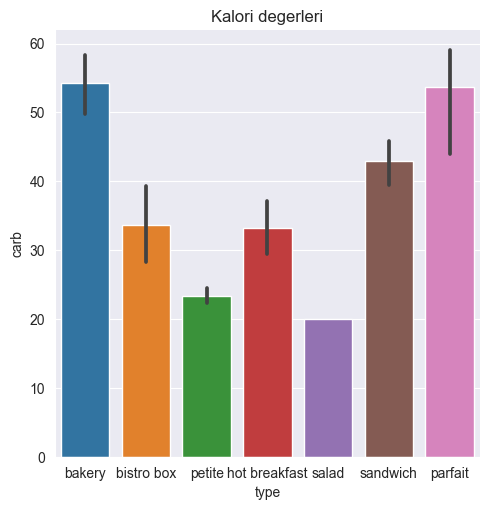

In [28]:
sbn.catplot(data=df,x = "type",y = "carb",kind = "bar")
plt.title("Kalori degerleri")
plt.show()

In [31]:
df.dtypes

item         object
calories      int64
fat         float64
carb          int64
fiber         int64
protein       int64
type         object
dtype: object

In [34]:
df1 = df.drop(["item","type"],axis=1)
df1.corr().T # mesela kalori ile karbonhidratın arasında büyük bir ilişki var keza kalori ile yağ arasında da. kalori ile lif arasında ise kötü bir ilişki var.

,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


<Axes: >

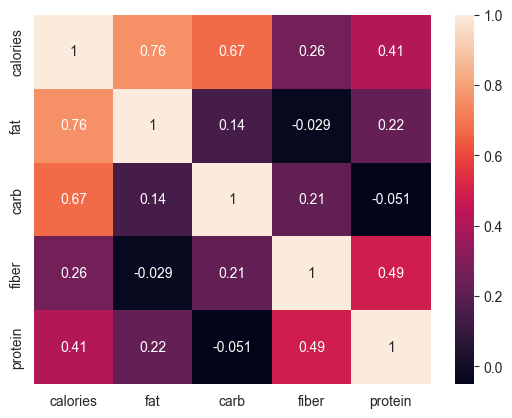

In [35]:
sbn.heatmap(df1.corr(),annot=True)

<Axes: title={'center': 'kalori ve yag'}, xlabel='calories', ylabel='fat'>

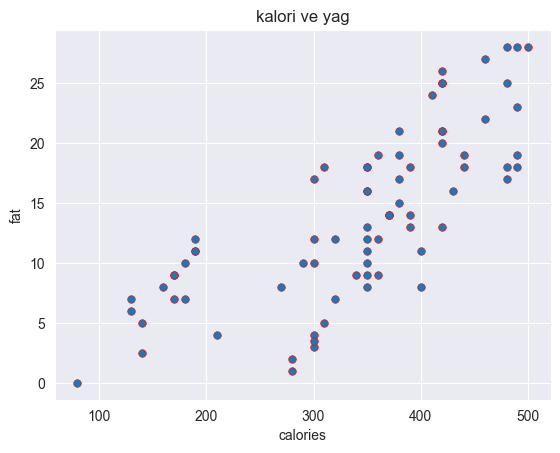

In [36]:
plt.title("kalori ve yag")
sbn.scatterplot(data=df,x = "calories",y = "fat",s = 30,edgecolor = "red") # genel olarak kalori arttıkça yağ artmış.

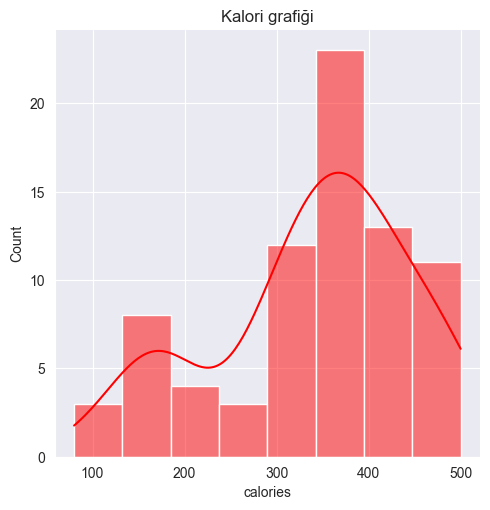

In [37]:
sbn.displot(data = df,x= "calories",color = "red",kde = True)
plt.title("Kalori grafiği")
plt.show()

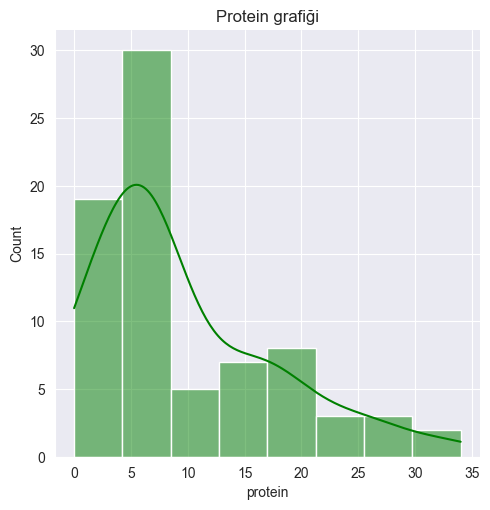

In [38]:
sbn.displot(data = df,x= "protein",color = "green",kde = True)
plt.title("Protein grafiği")
plt.show()

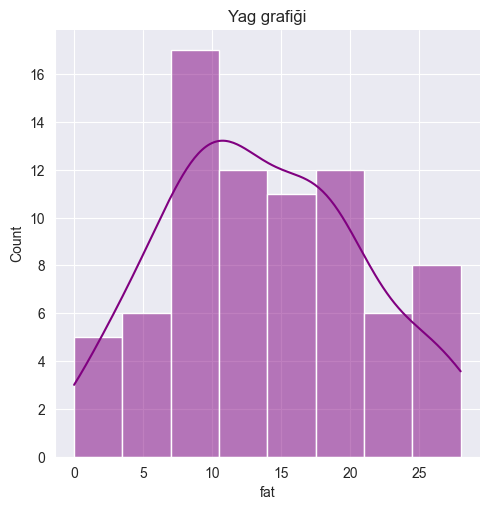

In [41]:

sbn.displot(data = df,x= "fat",color = "purple",kde = True)
plt.title("Yag grafiği")
plt.show()

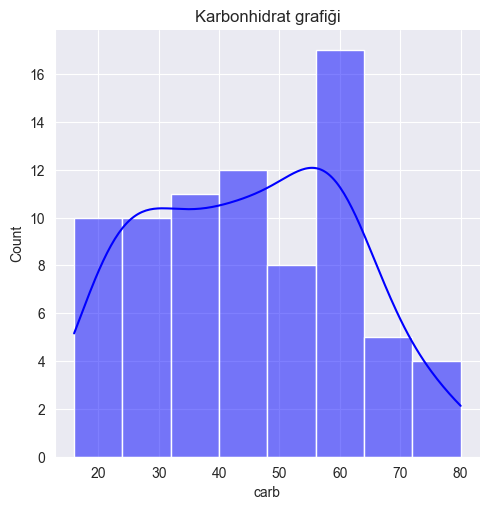

In [42]:

sbn.displot(data = df,x= "carb",color = "blue",kde = True)
plt.title("Karbonhidrat grafiği")
plt.show()

In [51]:
x = df[["calories","fat","carb","fiber","protein"]]
y = df["type"]
x


,calories,fat,carb,fiber,protein
1,350,8.0,67,5,10
2,350,9.0,64,7,6
3,420,20.0,59,0,5
4,490,19.0,75,4,7
5,130,6.0,17,0,0
...,...,...,...,...,...
73,420,13.0,46,6,32
74,390,13.0,36,2,34
75,300,12.0,44,0,8
76,300,4.0,57,3,10


In [52]:
y

1       bakery
2       bakery
3       bakery
4       bakery
5       bakery
        ...   
73    sandwich
74    sandwich
75     parfait
76     parfait
77     parfait
Name: type, Length: 77, dtype: object

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train,y_train) # fit ile eğitme yaparız.
    


DecisionTreeClassifier()

In [54]:
y_pred = model.predict(x_test)


In [55]:
accury = accuracy_score(y_test,y_pred)
accury # 0.66666 verdi fena değil bu değer.   bu değerin iyi olması veri seti ile alakalıdır.

0.6666666666666666

In [65]:
prediction = model.predict([[300,3,60,1,5]])

c:\Users\emrea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
prediction # bakery olabilir dedi.  yüzde 66'lık oranla doğru buldu.

array(['bakery'], dtype=object)